In [1]:
import pandas as pd # can read the csv file , pre processing , remove null value
import numpy as np # any numerical data and get mean etc
import seaborn as sns # used to visualize data
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler #for all ML terms and lib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets

In [2]:
df = pd.read_csv("/content/cardio_train.csv")
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [65]:
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [66]:
df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Pre Processing

In [67]:
df = df.drop("id",axis = 1)

In [68]:
df.describe()
#25% data what we get mean etc
#null

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [70]:
#CHECKnull
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Correlation is a statistical measure that expresses the extent to which two variables are linearly related

between one to portability


<Axes: >

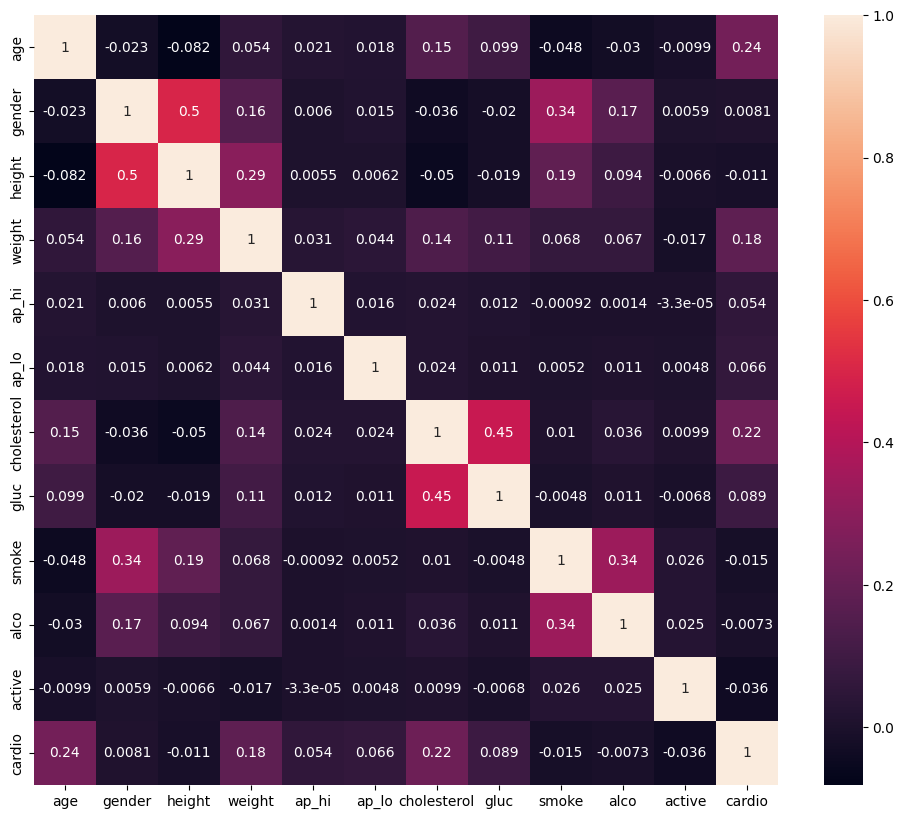

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)#which features has highest corrilation to the target
# 1 means it is perfectly correlated or correlated with itself

<Axes: xlabel='cardio', ylabel='count'>

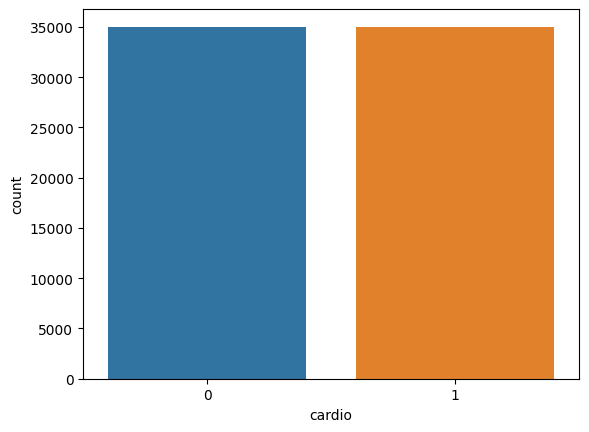

In [72]:
sns.countplot(x="cardio",data=df)
#checking how many have cardio and how many dont

In [73]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

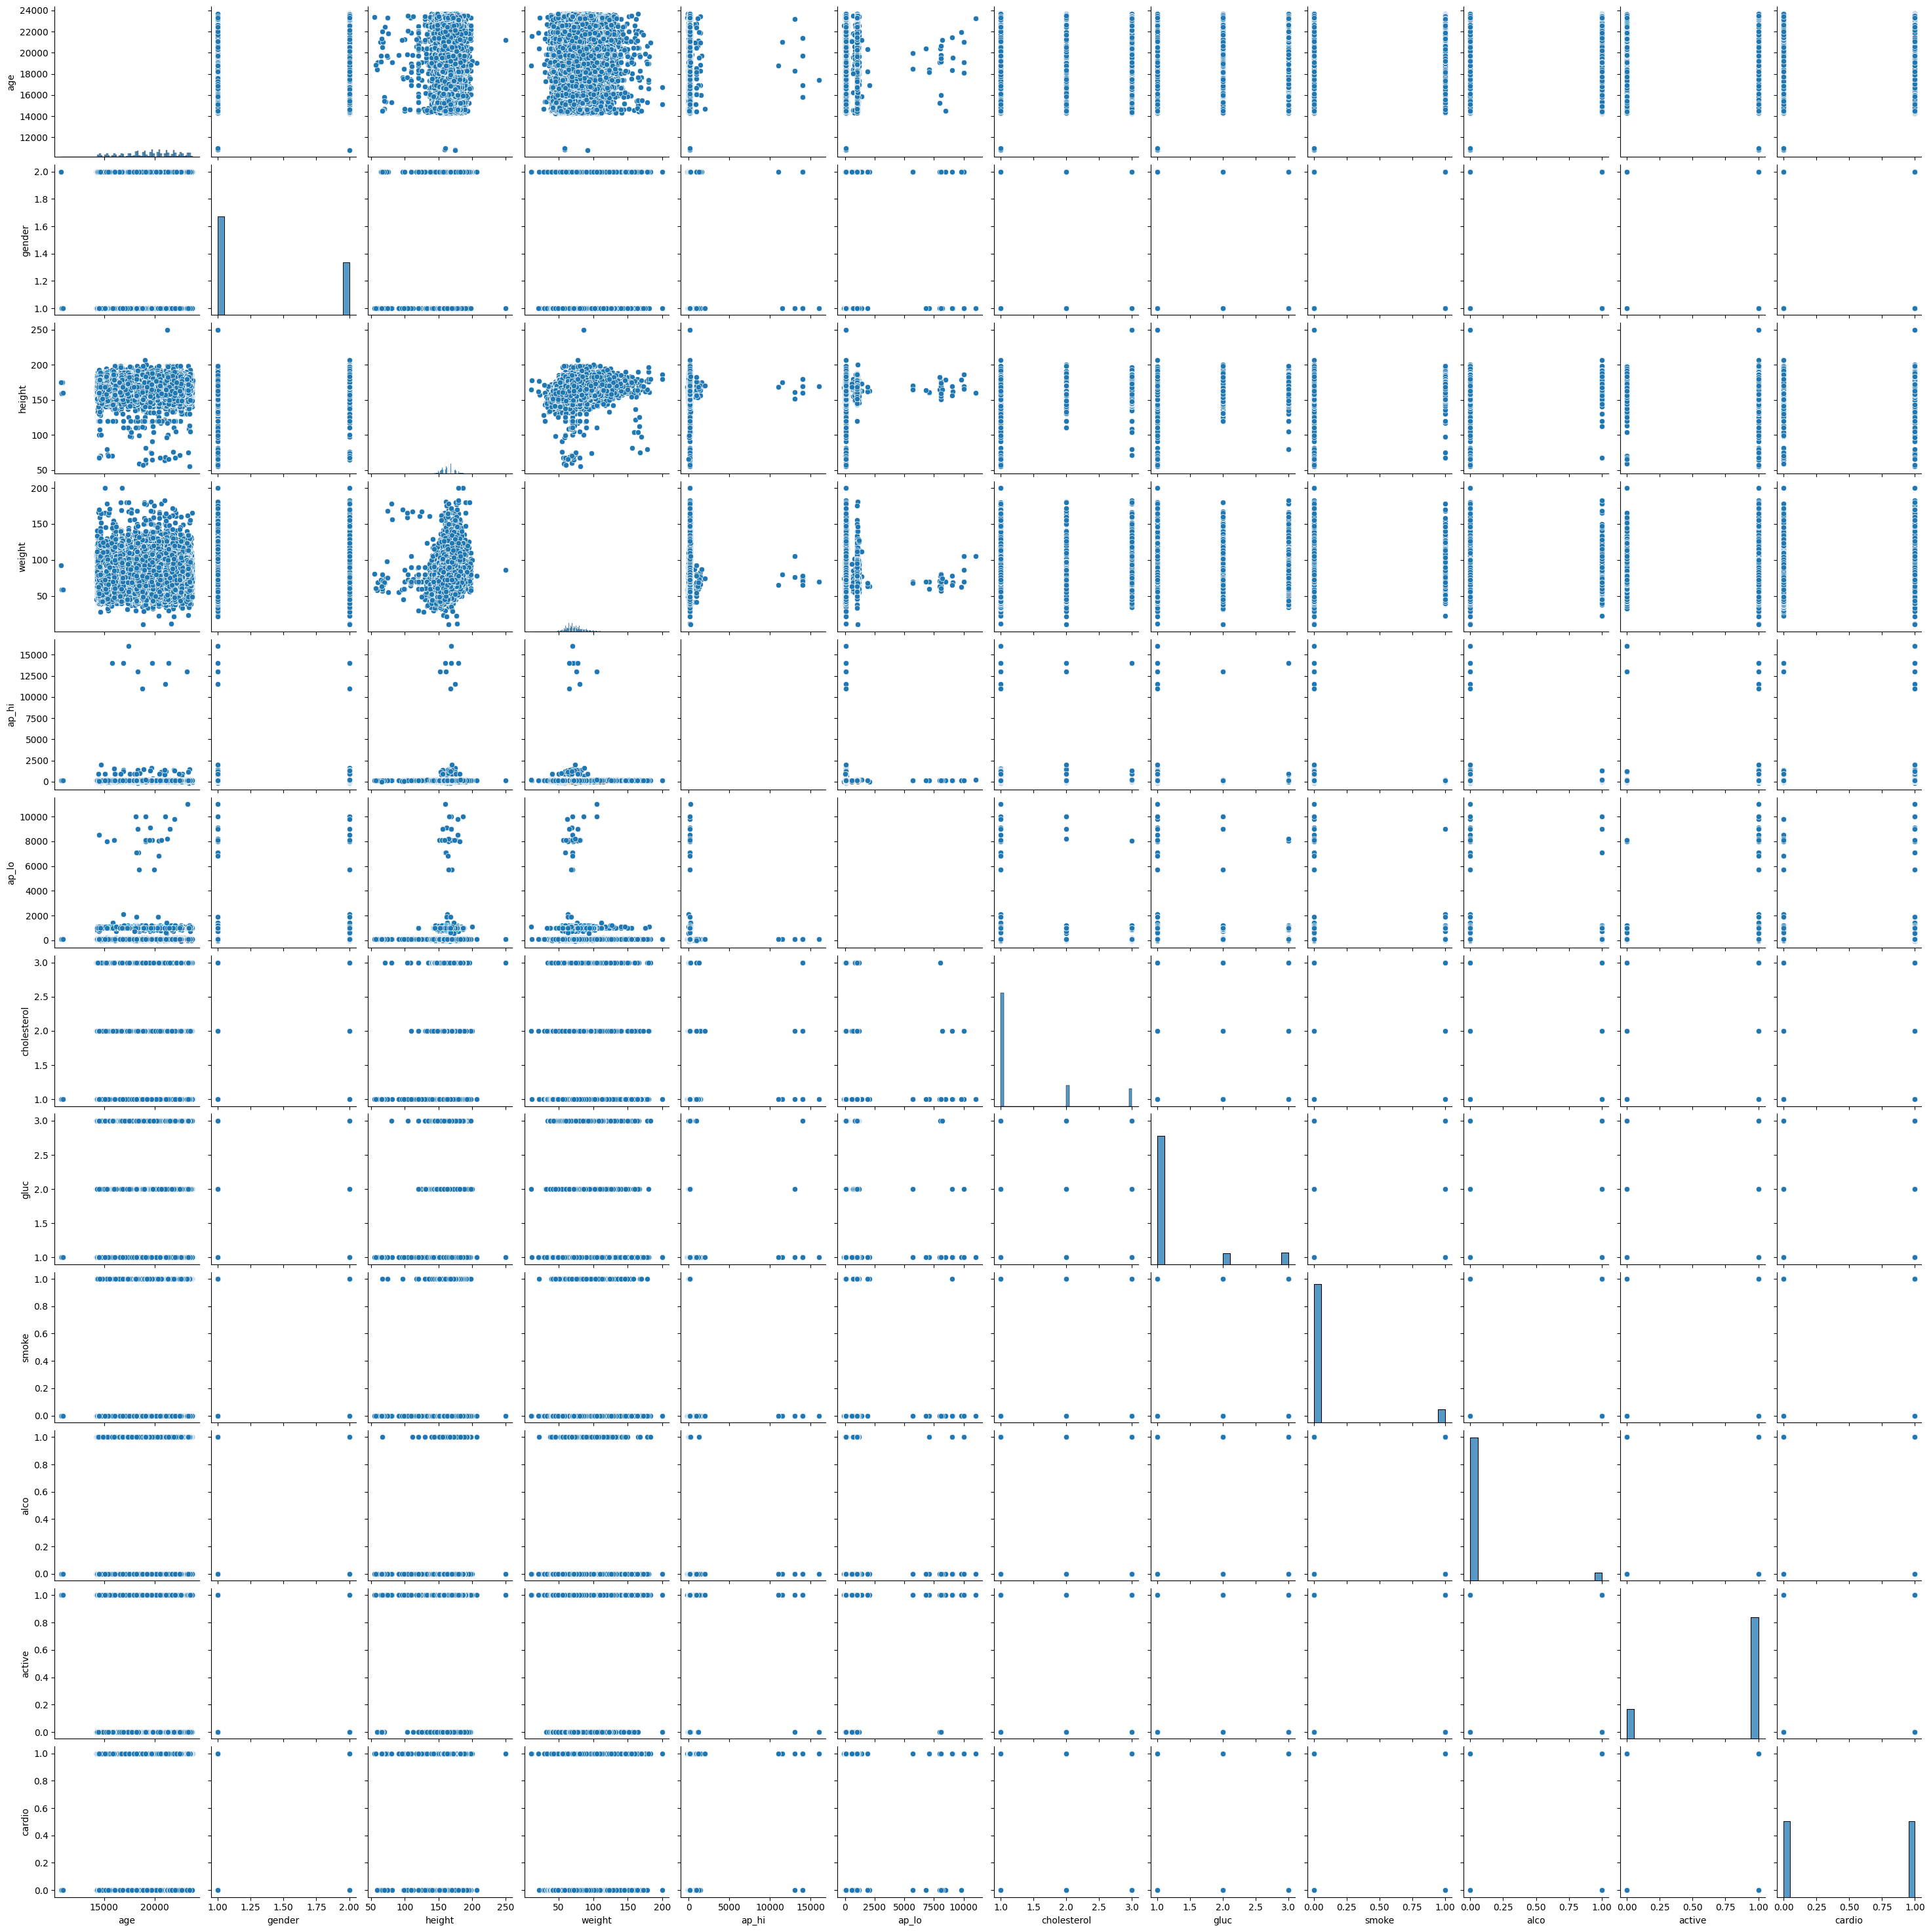

In [74]:
sns.pairplot(df)

In [75]:
fig = px.pie(df,names="cardio",hole = 0.4,template = "plotly_dark")
fig.show()

In [76]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Preparing the data

In [77]:
df.head()
#keep everything on same scale exept out

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [78]:
x = df.drop("cardio",axis = 1)#the features
y = df["cardio"]#the target

In [79]:
x.shape,y.shape
#no of row and features

((70000, 11), (70000,))

In [80]:

scaler = StandardScaler()
#x-mean/standard deviation eve betweeen -1 to 1
x = scaler.fit_transform(x)#calculate mean and apply for all col
x


array([[-0.43606151,  1.36405487,  0.44345206, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.30768633, -0.73310834, -1.01816804, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.24799666, -0.73310834,  0.07804703, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.16328642,  1.36405487,  2.27047718, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.20058905, -0.73310834, -0.16555632, ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.43414373, -0.73310834,  0.68705541, ..., -0.31087913,
        -0.23838436,  0.49416711]])

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [82]:
x_train.shape,x_test.shape

((49000, 11), (21000, 11))

In [83]:
#logistic regression

# object of LR
model = LogisticRegression()

In [84]:
#Training MOD
model.fit(x_train,y_train)

LogisticRegression()

In [85]:
#predict Mke
pred = model.predict(x_test)

In [86]:
#accuracy score
accuracy_score_lg = accuracy_score(y_test,pred)
accuracy_score_lg*100

72.11904761904762

In [87]:
#Decision Tree Classifier

In [88]:
#model_dt = DecisionTreeClassifier(max_depth = 8  ,random_state = 100 )
#train
model_dt = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_depth = 8,  min_samples_split = 6,
                              min_samples_leaf = 4, max_features = 9)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=9,
                       min_samples_leaf=4, min_samples_split=6)

In [89]:
#pred
pred_dt = model_dt.predict(x_test)
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

73.1952380952381

In [90]:
#sns.heatmap(cm2/np.sum(cm2))

RANDOM FOREST CLASSIFIER

In [91]:
#create object
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_rf = RandomForestClassifier(max_depth = 14 , random_state = 12,n_estimators=30)
model_rf.fit(x_train,y_train)
#train RF

RandomForestClassifier(max_depth=14, n_estimators=30, random_state=12)

In [92]:
#predict
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test , pred_rf)
accuracy_score_rf*100

74.02857142857144

In [93]:

#confussion matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3
# 367 correct classifed as 0 and 35 is wrong classifed as 0
# 169 correct classifed as 1 and 85 is wrong classifed as 1

array([[5438, 1607],
       [2029, 4926]])

KNN -- K-Neighbours

In [94]:
#create object
model_knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [95]:
#check for which neighbor u get better accuracy
for i in range(3,25):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)

3 0.6354761904761905
4 0.6313333333333333
5 0.6489047619047619
6 0.6420476190476191
7 0.6529047619047619
8 0.6497619047619048
9 0.6588095238095238
10 0.6544761904761904
11 0.661
12 0.6560476190476191
13 0.6624761904761904
14 0.6597619047619048
15 0.6642857142857143
16 0.6604761904761904
17 0.6635714285714286
18 0.6605714285714286
19 0.6668095238095239
20 0.6597619047619048
21 0.6664761904761904
22 0.6620952380952381
23 0.6653333333333333
24 0.6633333333333333


In [96]:
  model_knn = KNeighborsClassifier(n_neighbors=6)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(accuracy_score_knn)

0.6420476190476191


SVM -- support vector machine

In [97]:
#object
# Kernel Function generally transforms the training set of data so that a non-linear
#decision surface is able to transform to a linear equation in a higher number of dimension spaces
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf',C=1,gamma ='auto')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 23 ,shuffle = True)
#train
model_svm.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [98]:

#predict
pred_svm = model_svm.predict(x_test)
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

72.69285714285715

In [99]:
models = pd.DataFrame({
    "model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               ],
    "Accuracy Score" : [accuracy_score_lg ,accuracy_score_dt ,
                          accuracy_score_rf ,accuracy_score_knn ,
                          accuracy_score_svm ]

})

In [100]:
models

,model,Accuracy Score
0,Logistic Regression,0.721190
1,Decision Tree,0.731952
2,Random Forest,0.740286
3,KNN,0.642048
4,SVM,0.726929


,model,Accuracy Score
2,Random Forest,0.740286
1,Decision Tree,0.731952
4,SVM,0.726929
0,Logistic Regression,0.721190
3,KNN,0.642048


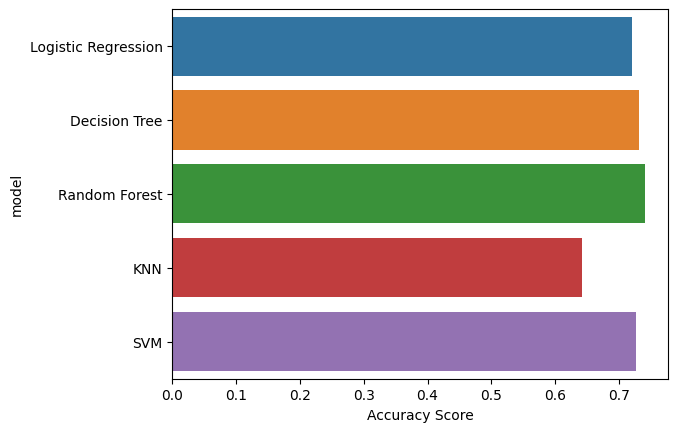

In [101]:
sns.barplot(x="Accuracy Score", y= "model",data = models)
models.sort_values(by = "Accuracy Score",ascending = False)

In [102]:
#;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
#example to enter below
#18393;2;168;62.0;110;80;1;1;0;0;1;0

In [107]:
v1=int(input("Enter age vlaue  :"))
v1

Enter age vlaue  :18393


18393

In [108]:
v2=int(input("Enter gender vlaue :"))
v2

Enter gender vlaue :2


2

In [109]:
v3=float(input("Enter height vlaue  :"))
v3

Enter height vlaue  :168


168.0

In [110]:
v4=float(input("Enter weight vlaue  :"))
v4

Enter weight vlaue  :62.0


62.0

In [111]:
v5=float(input("Enter ap_hi vlaue  :"))
v5

Enter ap_hi vlaue  :110


110.0

In [112]:
v6=float(input("Enter ap_lo vlaue  :"))
v6

Enter ap_lo vlaue  :80


80.0

In [113]:
v7=int(input("Enter cholesterol vlaue :"))
v7

Enter cholesterol vlaue :1


1

In [115]:
v8=int(input("Enter gluc vlaue :"))
v8

Enter gluc vlaue :1


1

In [116]:
v9=int(input("Enter smoke vlaue :"))
v9

Enter smoke vlaue :0


0

In [117]:
v10=int(input("Enter alco vlaue :"))
v10

Enter alco vlaue :0


0

In [118]:
v11=int(input("Enter active vlaue :"))
v11

Enter active vlaue :1


1

In [121]:
X_new = [[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11]]
y_pred = model_rf.predict(X_new)
print (y_pred)
if (y_pred==1):
  print ("Have Cardio")
else:
  print(" not Cardio")

[1]
Have Cardio
